<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Previously" data-toc-modified-id="Previously-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Previously</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Settings" data-toc-modified-id="Settings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Settings</a></span></li><li><span><a href="#Useful-functions" data-toc-modified-id="Useful-functions-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Useful functions</a></span><ul class="toc-item"><li><span><a href="#New-scoring" data-toc-modified-id="New-scoring-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>New scoring</a></span></li></ul></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Pre-treatment-of-data" data-toc-modified-id="Pre-treatment-of-data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Pre-treatment of data</a></span></li><li><span><a href="#Train-set-&amp;-test-set" data-toc-modified-id="Train-set-&amp;-test-set-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Train set &amp; test set</a></span></li><li><span><a href="#Re-sampling-train-set-with-SMOTE" data-toc-modified-id="Re-sampling-train-set-with-SMOTE-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Re-sampling train set with SMOTE</a></span></li></ul></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#Hyperparameters-optimization" data-toc-modified-id="Hyperparameters-optimization-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Hyperparameters optimization</a></span><ul class="toc-item"><li><span><a href="#GridSearchCV" data-toc-modified-id="GridSearchCV-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>GridSearchCV</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Optimization" data-toc-modified-id="Optimization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Optimization</a></span><ul class="toc-item"><li><span><a href="#GridSearch-CV" data-toc-modified-id="GridSearch-CV-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>GridSearch CV</a></span></li></ul></li></ul></li><li><span><a href="#SGD-Classifier" data-toc-modified-id="SGD-Classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SGD Classifier</a></span><ul class="toc-item"><li><span><a href="#Hyperparameters-optimisation" data-toc-modified-id="Hyperparameters-optimisation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hyperparameters optimisation</a></span><ul class="toc-item"><li><span><a href="#Grid-Search-CV" data-toc-modified-id="Grid-Search-CV-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Grid Search CV</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Optimal-threshold" data-toc-modified-id="Optimal-threshold-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Optimal threshold</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature importance</a></span></li></ul></div>

## Introduction

In this notebook, development of machine learning classification models will be reported

### Previously

EDA was performed from a Kaggle kernel
Pre-processing was performed from a Kaggle kernel
The best model was selected after some tests in the previous notebook (machine_learning)

### Imports

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
#import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn 
#from sklearn.impute import SimpleImputer
import scikitplot as skplt

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, roc_auc_score, auc, precision_score, recall_score, f1_score, roc_curve, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.decomposition import PCA

# Imb-learn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

#SGD Classifier
from sklearn.linear_model import SGDClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
#from sklearn.tree import DecisionTreeClassifier

# Feature importance
import shap

# Threshold
from yellowbrick.classifier.threshold import discrimination_threshold

# Export
import pickle

### Settings

In [2]:
%config IPCompleter.greedy=True #Auto-completion
sns.set(style='white')
pd.options.display.max_colwidth = 90  # set column width to see all of it
pd.set_option('display.max_columns', 50) # display max. 50 columns
pd.set_option('display.max_rows', 100)  # display max. 100 rows

# Random State
random_state = 77

### Useful functions

In [3]:
def make_model(clf):
    model = Pipeline([
            ('scaler', StandardScaler()),
            # ('sampling', SMOTE(random_state=random_state, k_neighbors=3)),
            ('classification', clf)
        ])
    return model

In [4]:
def clf_results(clf_name, clf, X, y, X_train, y_train, X_test, y_test):
    
    """
    This function displays all results from a trained classification model
    Inputs : 
    - clf_name : str, name of the model
    - clf : model trained
    - X, y : data and target (dataframe or array)
    - X_train, y_train, X_test, y_test : data and target after train_test_split (dataframe or array)
    
    Outputs : 
    - train score
    - test score
    - classification report
    - confusion matrix
    - ROC AUC score
    - ROC curve
    """
    
    #Train score vs test score
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    # ROC AUC score 
    y_score_train = clf.predict_proba(X_train)[:, 1]
    roc_train = roc_auc_score(y_train, y_score_train)
    y_score_test = clf.predict_proba(X_test)[:, 1]
    roc_test = roc_auc_score(y_test, y_score_test)
    
    #Make prediction
    y_pred = clf.predict(X)
                           
    #Report
    print('Model:', clf)
    print('Train score:', train_score) 
    print('Test_score:', test_score)
    print('ROC AUC train score:', roc_train)
    print('ROC AUC test score:', roc_test)
    print('F1 score:', f1_score(y, y_pred))
    print('Fbeta score:', fbeta_score(y_true=y, y_pred=y_pred, beta=2))
    print('Credit score:', credit_scorer(clf, X, y))
    print(classification_report(y_true=y, y_pred=y_pred))
    print('Confusion matrix\n', confusion_matrix(y_true=y, y_pred=y_pred))

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name=clf_name)
    display.plot()
    plt.title('ROC curve')
    plt.show()
    
    

In [5]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def conf_mat_visu(clf, X, y):
    """
    This function displays the confusion matrix. Adapted from ConfusionMatrixDisplay()
    """
    predictions = clf.predict(X)
    cm = confusion_matrix(y, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
    disp.plot()
    plt.title('Matrice de confusion')
    plt.show()

    

In [106]:
# from sklearn.metrics import confusion_matrix
# custom_metric
# attention ! negative class :0 == target ==0 : paiment, positive class: 1 == target ==1 (no paiment)
# True positive = bad clients identified as bad, true negative = good clients
# False positive = good clients identified as bad, false negative = bad clients identified as good

def credit_score(y_true, y_pred, tp_cost=0, tn_cost=0, fp_cost=1, fn_cost=-10):
    mat = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = mat.ravel()
    cost = (tp*tp_cost + tn*tn_cost + fn*fn_cost + fp*fp_cost)  #/y_true.size
    best = ((tn+fp)*tn_cost + (tp+fn)*tp_cost)   #/y_true.size
    baseline = ((tn+fp)*tn_cost + (tp+fn)* fn_cost)  #/y_true.size
    score = (cost-baseline)/(best-baseline)
    return score

Ma démarche a été la suivante : une société de crédit est une société "à but lucratif". J'ai donc supposé qu'elle cherche à optimiser ses revenus. J'ai ensuite associé à chacune des quatre situations possibles (FP, TP, FN, TN) une "valeur" (gain ou coût pour l'entreprise). En l'occurrence, j'ai considéré : TP_value = FP_value = 0 ; TN_value = 1 et FN_value = -10. Ce sont des valeurs arbitraires qui devraient être revues par l'entreprise en fonction de la "réalité métier" (cela revient à fixer le lambda de tes métriques). À partir de cela, j'ai construit le gain (fonction d'utilité si tu préfère) de l'entreprise. Et j'ai normalisé pour obtenir une valeur entre 0 (modèle naïf qui prédit la classe non-défaut à tous) et 1 (modèle parfait qui prédit les vrais classes). Cela me donne donc une "métrique métier", qui peut facilement être paramétrisée avec TN_value  et FN_value.


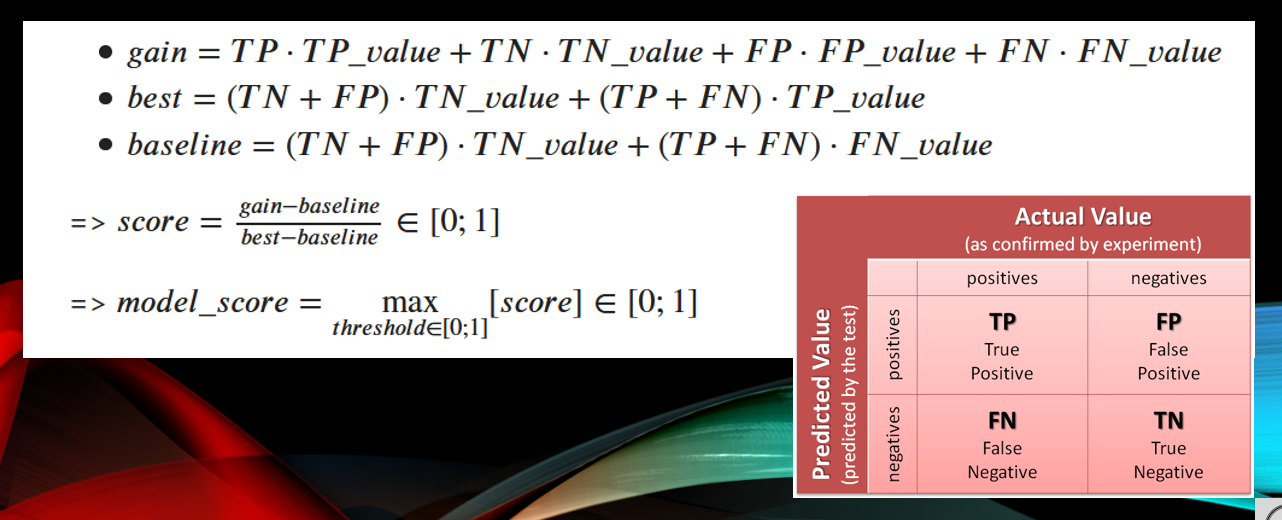

In [22]:
def custom_metric_score(y_true, y_pred, fn_value=-1, fp_value=-10, tp_value=0, tn_value=1):

    # confusion matrix extraction
    mat_conf = confusion_matrix(y_true,y_pred)
    
    tp = mat_conf[0, 0]
    fp = mat_conf[1, 0]
    tn = mat_conf[0, 1]
    fn = mat_conf[1, 1]
    
    Gain_tot = tp*tp_value + tn*tn_value + fp*fp_value + fn*fn_value
    Gain_max = (fp + tn)*tn_value + (fn + tp)*tp_value
    Gain_min = (fp + tn)*fp_value + (fn + tp)*fn_value
    
    score = (Gain_tot - Gain_min)/(Gain_max - Gain_min)
    
    return score  

#### New scoring

In [107]:
credit_scorer = make_scorer(credit_score, greater_is_better=True)

In [8]:
ftwo_scorer = make_scorer(fbeta_score, beta=2)  # Variation beta

### Read data

In [68]:
data = pd.read_csv('p7_clean_dataset_for_ml.csv')

X = data.drop(columns=['TARGET'])
y = data['TARGET']

print("X dimensions : ", X.shape)
print("y dimensions : ", y.shape)

X dimensions :  (356251, 644)
y dimensions :  (356251,)


In [69]:
features_name = X.columns[:]
features_name

Index(['SK_ID_CURR', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'INSTAL_AMT_INSTALMENT_MEAN', 'INSTAL_AMT_INSTALMENT_SUM',
       'INSTAL_AMT_PAYMENT_MIN', 'INSTAL_AMT_PAYMENT_MAX',
       'INSTAL_AMT_PAYMENT_MEAN', 'INSTAL_AMT_PAYMENT_SUM',
       'INSTAL_DAYS_ENTRY_PAYMENT_MAX', 'INSTAL_DAYS_ENTRY_PAYMENT_MEAN',
       'INSTAL_DAYS_ENTRY_PAYMENT_SUM', 'INSTAL_COUNT'],
      dtype='object', length=644)

In [10]:
data['TARGET'].value_counts()

0.0    331426
1.0     24825
Name: TARGET, dtype: int64

### Pre-treatment of data

In [81]:
X = StandardScaler().fit_transform(X)

In [82]:
# Dimension reduction
print("Dimensions before PCA : ", X.shape)
pca = PCA(n_components=.99)
X = pca.fit_transform(X)
print("Dimensions after PCA : ", X.shape)

Dimensions before PCA :  (356251, 644)
Dimensions after PCA :  (356251, 435)


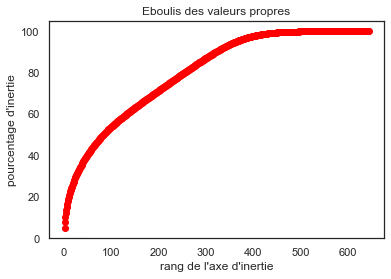

In [24]:
display_scree_plot(pca)

In [19]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

### Train set & test set

In [12]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=77)

### Re-sampling train set with SMOTE

In [13]:
print('Original dataset shape', X_train.shape, y_train.shape)

smote = SMOTE(random_state=random_state)
# fit predictor and target variable
X_train, y_train = smote.fit_resample(X_train, y_train)

print('Resample dataset shape', X_train.shape, y_train.shape)

Original dataset shape (249375, 435) (249375,)
Resample dataset shape (464074, 435) (464074,)


## Random Forest Classifier

### Hyperparameters optimization

In [14]:
clf = RandomForestClassifier(random_state=random_state, criterion='gini', max_features='auto')
model = make_model(clf)
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classification',
                 RandomForestClassifier(max_features='auto', random_state=77))])

In [16]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'classification', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'classification__bootstrap', 'classification__ccp_alpha', 'classification__class_weight', 'classification__criterion', 'classification__max_depth', 'classification__max_features', 'classification__max_leaf_nodes', 'classification__max_samples', 'classification__min_impurity_decrease', 'classification__min_samples_leaf', 'classification__min_samples_split', 'classification__min_weight_fraction_leaf', 'classification__n_estimators', 'classification__n_jobs', 'classification__oob_score', 'classification__random_state', 'classification__verbose', 'classification__warm_start'])

#### GridSearchCV

In [17]:
### Random forest

rf_param_grid = {
    'classification__n_estimators' : np.arange(100, 500, 100),
    'classification__max_depth' : np.arange(2, 11, 3)
                }
# scorers = {'roc_auc':'roc_auc', 'f_beta_score' : ftwo_scorer, 'credit_score': credit_scorer}


In [18]:
grid = GridSearchCV(model, param_grid=rf_param_grid, cv=3, scoring='roc_auc', verbose=1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classification',
                                        RandomForestClassifier(max_features='auto',
                                                               random_state=77))]),
             param_grid={'classification__max_depth': array([2, 5, 8]),
                         'classification__n_estimators': array([100, 200, 300, 400])},
             scoring='roc_auc', verbose=1)

In [19]:
print(grid.best_score_)
print(grid.best_params_)

0.8373641249926208
{'classification__max_depth': 8, 'classification__n_estimators': 400}


In [20]:
rf_model = grid.best_estimator_
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.7310340955874097

#### Results

Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('classification',
                 RandomForestClassifier(max_depth=8, max_features='auto',
                                        n_estimators=400, random_state=77))])
Train score: 0.7618655645435857
Test_score: 0.7310340955874097
ROC AUC train score: 0.845425563810436
ROC AUC test score: 0.6767676347279526
F1 score: 0.2176082220485274
Fbeta score: 0.3359659438113969
              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84    331426
         1.0       0.14      0.53      0.22     24825

    accuracy                           0.74    356251
   macro avg       0.55      0.64      0.53    356251
weighted avg       0.90      0.74      0.80    356251

Confusion matrix
 [[249074  82352]
 [ 11740  13085]]


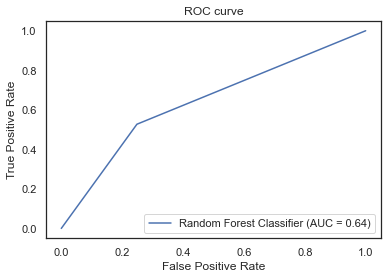

In [21]:
clf_results('Random Forest Classifier', rf_model, X, y, X_train, y_train, X_test, y_test)

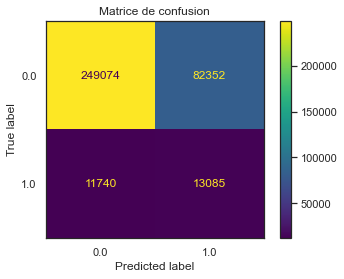

In [22]:
conf_mat_visu(rf_model, X, y)

### Optimization

#### GridSearch CV

## SGD Classifier

In [15]:
rf_param_grid = {
    'classification__n_estimators' : [350, 400, 450],
    'classification__max_depth' : [7, 8, 9]
                }

### Hyperparameters optimisation

In [19]:
clf = SGDClassifier(
    loss='log_loss', 
    penalty='l2', 
    learning_rate='optimal',
    validation_fraction=0.2, 
    random_state=random_state)

model = make_model(clf)
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classification',
                 SGDClassifier(loss='log_loss', random_state=77,
                               validation_fraction=0.2))])

In [20]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'classification', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'classification__alpha', 'classification__average', 'classification__class_weight', 'classification__early_stopping', 'classification__epsilon', 'classification__eta0', 'classification__fit_intercept', 'classification__l1_ratio', 'classification__learning_rate', 'classification__loss', 'classification__max_iter', 'classification__n_iter_no_change', 'classification__n_jobs', 'classification__penalty', 'classification__power_t', 'classification__random_state', 'classification__shuffle', 'classification__tol', 'classification__validation_fraction', 'classification__verbose', 'classification__warm_start'])

In [94]:
dummy_rf = RandomForestClassifier(random_state=random_state)
dummy_rf = make_model(dummy_rf)
dummy_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sampling', SMOTE(k_neighbors=3, random_state=77)),
                ('classification', RandomForestClassifier(random_state=77))])

In [95]:
dummy_rf.score(X_test, y_test)

0.7671694299936375

Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('sampling', SMOTE(k_neighbors=3, random_state=77)),
                ('classification', RandomForestClassifier(random_state=77))])
Train score: 0.8522947368421052
Test_score: 0.7671694299936375
ROC AUC train score: 0.7624912348195503
ROC AUC test score: 0.5036179612259273
F1 score: 0.2402629376138658
Fbeta score: 0.31336899769444676
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90    331426
         1.0       0.17      0.39      0.24     24825

    accuracy                           0.83    356251
   macro avg       0.56      0.63      0.57    356251
weighted avg       0.90      0.83      0.86    356251

Confusion matrix
 [[284774  46652]
 [ 15066   9759]]


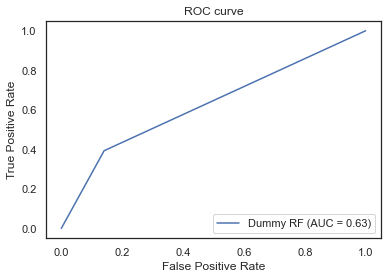

In [96]:
clf_results('Dummy RF', dummy_rf, X, y, X_train, y_train, X_test, y_test)

#### Grid Search CV

In [21]:
sgd_params = {
    'classification__alpha' : np.arange(0.0005 , 0.01, 0.0005),
}

# scorers = {
#    'roc_auc':'roc_auc',
#    'credit_score': credit_scorer
# }

In [22]:
grid = GridSearchCV(model, param_grid=sgd_params, cv=3, scoring='roc_auc', verbose=1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 19 candidates, totalling 57 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classification',
                                        SGDClassifier(loss='log_loss',
                                                      random_state=77,
                                                      validation_fraction=0.2))]),
             param_grid={'classification__alpha': array([0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035, 0.004 ,
       0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075, 0.008 ,
       0.0085, 0.009 , 0.0095])},
             scoring='roc_auc', verbose=1)

### Results

In [23]:
print(grid.best_score_)
print(grid.best_params_)

0.8145450744870849
{'classification__alpha': 0.0085}


In [24]:
sgd_model = grid.best_estimator_
sgd_model.fit(X_train, y_train)
sgd_model.score(X_test, y_test)

0.7183652082787529

Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('classification',
                 SGDClassifier(alpha=0.0085, loss='log_loss', random_state=77,
                               validation_fraction=0.2))])
Train score: 0.7421424169421256
Test_score: 0.7183652082787529
ROC AUC train score: 0.8157556682134104
ROC AUC test score: 0.7591530182364695
F1 score: 0.24534980722837238
Fbeta score: 0.39326086328023363
Credit score: 1.0277583081570998
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83    331426
         1.0       0.15      0.66      0.25     24825

    accuracy                           0.72    356251
   macro avg       0.56      0.69      0.54    356251
weighted avg       0.91      0.72      0.79    356251

Confusion matrix
 [[239515  91911]
 [  8502  16323]]


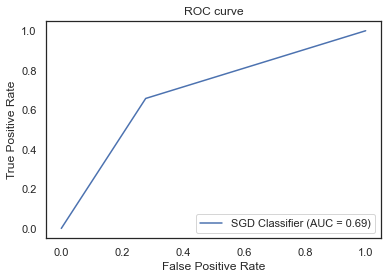

In [29]:
clf_results('SGD Classifier', sgd_model, X, y, X_train, y_train, X_test, y_test)

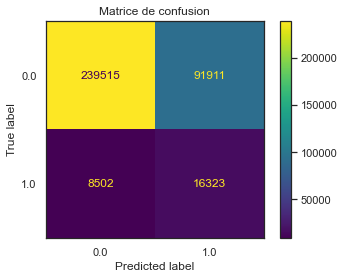

In [30]:
conf_mat_visu(sgd_model, X, y)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

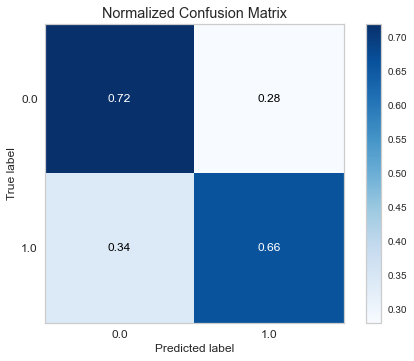

In [47]:
y_pred = sgd_model.predict(X)
skplt.metrics.plot_confusion_matrix(y, y_pred, normalize=True)

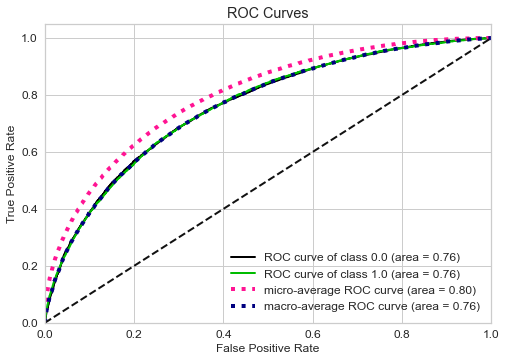

In [48]:
y_probas = sgd_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

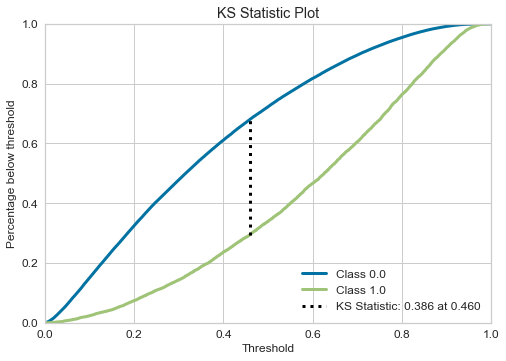

In [49]:
skplt.metrics.plot_ks_statistic(y_test, y_probas)
plt.show()

In [35]:
# Best model to save
import pickle
pickle.dump(sgd_model, open('sgd_model.pkl', 'wb'))

In [79]:
# Load model
sgd_model = pickle.load(open('sgd_model.pkl', 'rb'))
# Check it worked
predictions = sgd_model.predict(X_test)
predictions

array([1., 0., 0., ..., 0., 0., 1.])

## Optimal threshold



Ce problème de classification présente un déséquilibre de classe. Donc,le seuil par dÃƒÂ©faut peut entraÃƒÂ®ner de mauvaises performances. Pour amÃƒÂ©liorer les performances d'un modÃƒÂ¨le qui prÃƒÂ©dit les probabilitÃƒÂ©s sur un problÃƒÂ¨me de classification dÃƒÂ©sÃƒÂ©quilibrÃƒÂ©, on va rÃƒÂ©gler le seuil utilisÃƒÂ© pour mapper les probabilitÃƒÂ©s aux ÃƒÂ©tiquettes de classe.


In [110]:
def optimal_threshold_search(y_true, y_prob, score_function):
    thresholds = np.linspace(0.0, 1, 20)
    scores_thresholds = []
    
    for th in thresholds:
            y_pred = (y_prob[:,1]>th)*1
            scores_thresholds.append(score_function(y_true,y_pred))
    # Plot  
    plt.plot(thresholds, scores_thresholds)
    plt.xlabel("Seuil de probabilité")
    plt.ylabel("Indice bancaire")
    plt.xticks(np.linspace(0.1, 1, 10))
    
    idx_best_th = scores_thresholds.index(max(scores_thresholds))
    return thresholds[idx_best_th]

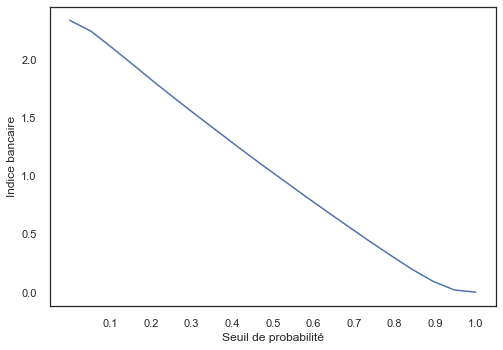

In [111]:
y_prob = sgd_model.predict_proba(X)
y_pred = sgd_model.predict(X)
optim_threshold = optimal_threshold_search(y, y_prob, credit_score)

In [112]:
optim_threshold

0.0

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

y_true = np.array([0.0, 1, 1.1])
y_scores = np.array([0.0, 0.09, .05, .75, 1])

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_true, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

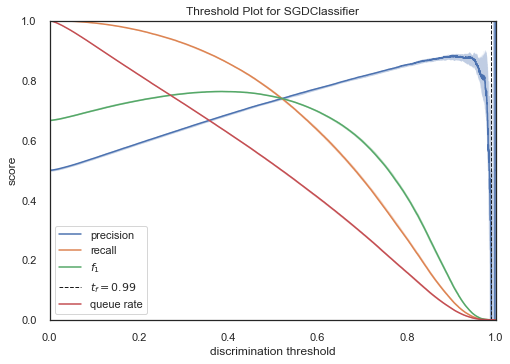

AttributeError: 'SGDClassifier' object has no attribute 'force_model'

AttributeError: 'SGDClassifier' object has no attribute 'force_model'

AttributeError: 'SGDClassifier' object has no attribute 'force_model'

In [97]:
discrimination_threshold(shap_model, X_train, y_train)

## Feature importance

In [66]:
# creating an explainer for our model, based on the sgd_model without pipeline
shap_model = SGDClassifier(
    alpha=0.0085,
    epsilon=0.1,
    l1_ratio=0.15,
    learning_rate='optimal',
    loss='log_loss',
    penalty='l2',
    random_state=random_state,
    validation_fraction=0.2
)

In [ ]:
optim_threshold

In [67]:
shap_model.fit(X_train, y_train)

SGDClassifier(alpha=0.0085, loss='log_loss', random_state=77,
              validation_fraction=0.2)

In [70]:
explainer = shap.Explainer(shap_model, X_test, feature_names=features_name)

In [71]:
shap_values = explainer.shap_values(X_test)

In [51]:
sgd_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classification',
   SGDClassifier(alpha=0.0085, loss='log_loss', random_state=77,
                 validation_fraction=0.2))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classification': SGDClassifier(alpha=0.0085, loss='log_loss', random_state=77,
               validation_fraction=0.2),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classification__alpha': 0.0085,
 'classification__average': False,
 'classification__class_weight': None,
 'classification__early_stopping': False,
 'classification__epsilon': 0.1,
 'classification__eta0': 0.0,
 'classification__fit_intercept': True,
 'classification__l1_ratio': 0.15,
 'classification__learning_rate': 'optimal',
 'classification__loss': 'log_loss',
 'classification__max_iter': 1000,
 'classification__n_iter_no_change': 5,
 'classification__n_jobs': None,
 'classification__penalty': 'l2',
 'classification__power_t': 0.5,
 'classification__

In [72]:
# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

Expected Value: -0.8571426807258962


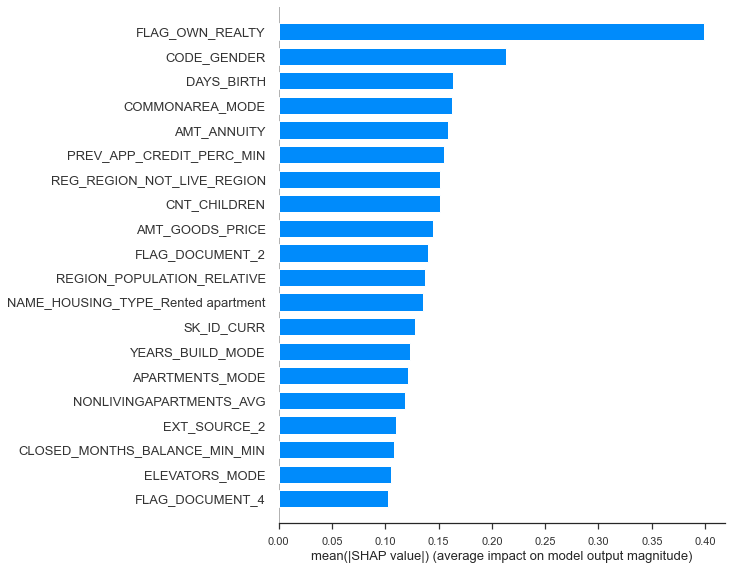

In [73]:
shap.summary_plot(shap_values, X_test, feature_names=features_name, plot_type="bar")

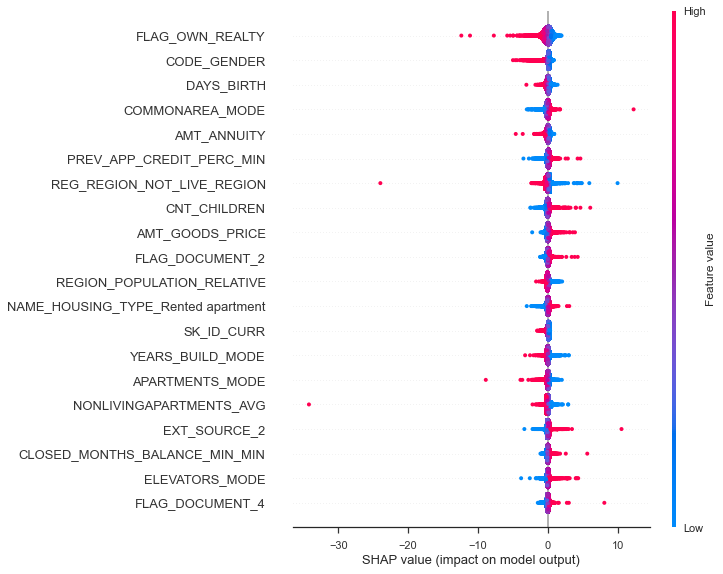

In [76]:
shap.summary_plot(shap_values, X_test, feature_names=features_name)

In [ ]:
X_shap = shap.sample(X, nsamples=10000, random_state=random_state)
X_train_shap, X_test_shap, y_train_shap, y_test_shap = train_test_split(X_shap, y_shap)

In [23]:
X_train_sample = shap.sample(X_train, nsamples=10000, random_state=random_state)
X_test_sample = shap.sample(X_test, nsamples=10000, random_state=random_state)

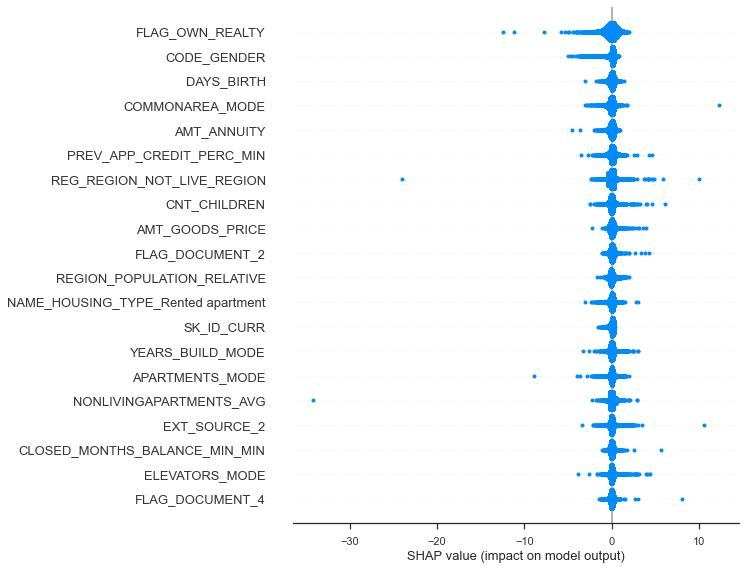

In [74]:
#Display summary plot
shap.summary_plot(shap_values = shap_values, features = features_name)

In [31]:
expected_values = explainer.expected_values

AttributeError: 'Linear' object has no attribute 'expected_values_'

In [ ]:
shap.kmeans()